##### Imports

In [124]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from sklearn.model_selection import train_test_split



##### Data Loading

In [125]:
walking_df = pd.read_csv("data\MLG __ Data - walking.csv")
running_df = pd.read_csv("data\MLG __ Data - Running.csv")

C:\Users\Admin\AppData\Local\Temp\ipykernel_14952\596919512.py:1: DtypeWarning: Columns (5,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  walking_df = pd.read_csv("data\MLG __ Data - walking.csv")
C:\Users\Admin\AppData\Local\Temp\ipykernel_14952\596919512.py:2: DtypeWarning: Columns (5,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  running_df = pd.read_csv("data\MLG __ Data - Running.csv")


In [126]:
walking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120747 entries, 0 to 120746
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Experiment                     120363 non-null  float64
 1   Time (s)                       52862 non-null   object 
 2   Linear Acceleration x (m/s^2)  52862 non-null   object 
 3   Linear Acceleration y (m/s^2)  52862 non-null   object 
 4   Linear Acceleration z (m/s^2)  52862 non-null   object 
 5   Absolute acceleration (m/s^2)  30363 non-null   object 
 6   Time (s).1                     120658 non-null  object 
 7   Gyroscope x (rad/s)            120658 non-null  object 
 8   Gyroscope y (rad/s)            120658 non-null  object 
 9   Gyroscope z (rad/s)            120658 non-null  object 
 10  Absolute (rad/s)               30658 non-null   object 
 11  Label                          6070 non-null    object 
dtypes: float64(1), object(11)
memo

In [127]:
running_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120610 entries, 0 to 120609
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   experiment                     120562 non-null  float64
 1   Time (s)                       53058 non-null   object 
 2   Linear Acceleration x (m/s^2)  53058 non-null   object 
 3   Linear Acceleration y (m/s^2)  53058 non-null   object 
 4   Linear Acceleration z (m/s^2)  53058 non-null   object 
 5   Absolute acceleration (m/s^2)  30560 non-null   object 
 6   Time (s).1                     120515 non-null  object 
 7   Gyroscope x (rad/s)            120515 non-null  object 
 8   Gyroscope y (rad/s)            120515 non-null  object 
 9   Gyroscope z (rad/s)            120515 non-null  object 
 10  Absolute (rad/s)               30513 non-null   object 
 11  Label                          12269 non-null   object 
dtypes: float64(1), object(11)
memo

In [128]:
walking_df.head()

,Experiment,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2),Absolute acceleration (m/s^2),Time (s).1,Gyroscope x (rad/s),Gyroscope y (rad/s),Gyroscope z (rad/s),Absolute (rad/s),Label
0,1.0,"5,24E-03","6,36E-01","1,15E+00","-1,55E+00","2,03E+00","5,82E-03","-4,16E-01","-9,86E-01","-5,83E-01","1,22E+00",walking
1,1.0,"1,53E-02","2,69E-01","1,29E+00","-1,57E+00","2,05E+00","1,58E-02","-4,64E-01","-9,81E-01","-5,24E-01","1,21E+00",walking
2,1.0,"2,53E-02","1,36E-01","1,49E+00","-1,06E+00","1,83E+00","2,59E-02","-5,24E-01","-9,75E-01","-4,71E-01","1,20E+00",walking
3,1.0,"3,53E-02","-9,98E-02","1,55E+00","-3,90E-01","1,60E+00","3,59E-02","-5,81E-01","-9,01E-01","-4,26E-01","1,15E+00",walking
4,1.0,"4,53E-02","-3,31E-01","1,46E+00","4,85E-01","1,57E+00","4,59E-02","-5,82E-01","-7,14E-01","-3,72E-01","9,94E-01",walking


In [129]:
running_df.head()

,experiment,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2),Absolute acceleration (m/s^2),Time (s).1,Gyroscope x (rad/s),Gyroscope y (rad/s),Gyroscope z (rad/s),Absolute (rad/s),Label
0,1.0,"4,25E-03","-2,47E+00","1,96E+00","-2,07E+00","3,77E+00","-2,49E-03","-2,74E-01","-5,30E-01","2,45E-01","6,45E-01",running
1,1.0,"1,43E-02","-2,76E+00","2,14E+00","-2,55E+00","4,32E+00","7,53E-03","-3,75E-01","-5,30E-01","2,89E-01","7,11E-01",running
2,1.0,"2,43E-02","-2,85E+00","2,41E+00","-2,96E+00","4,77E+00","1,75E-02","-4,80E-01","-4,58E-01","3,27E-01","7,40E-01",running
3,1.0,"3,43E-02","-2,79E+00","2,74E+00","-3,38E+00","5,17E+00","2,76E-02","-6,01E-01","-3,49E-01","3,45E-01","7,76E-01",running
4,1.0,"4,43E-02","-2,91E+00","2,91E+00","-3,59E+00","5,46E+00","3,76E-02","-7,39E-01","-2,25E-01","3,48E-01","8,47E-01",running


In [130]:
walking_df.describe()

,Experiment
count,120363.000000
mean,5.989307
std,2.007731
min,1.000000
25%,5.000000
50%,6.000000
75%,7.000000
max,8.000000


In [131]:
running_df.describe()

,experiment
count,120562.000000
mean,5.984962
std,2.009734
min,1.000000
25%,5.000000
50%,6.000000
75%,7.000000
max,8.000000


In [132]:
running_df.isnull().sum()

experiment                           48
Time (s)                          67552
Linear Acceleration x (m/s^2)     67552
Linear Acceleration y (m/s^2)     67552
Linear Acceleration z (m/s^2)     67552
Absolute acceleration (m/s^2)     90050
Time (s).1                           95
Gyroscope x (rad/s)                  95
Gyroscope y (rad/s)                  95
Gyroscope z (rad/s)                  95
Absolute (rad/s)                  90097
Label                            108341
dtype: int64

In [133]:
walking_df.isnull().sum()

Experiment                          384
Time (s)                          67885
Linear Acceleration x (m/s^2)     67885
Linear Acceleration y (m/s^2)     67885
Linear Acceleration z (m/s^2)     67885
Absolute acceleration (m/s^2)     90384
Time (s).1                           89
Gyroscope x (rad/s)                  89
Gyroscope y (rad/s)                  89
Gyroscope z (rad/s)                  89
Absolute (rad/s)                  90089
Label                            114677
dtype: int64

In [134]:
# Update clean function to handle lowercase column name variation
def clean_sensor_df(df, label_name):
    df = df.copy()
    df['Label'] = label_name

    # Standardize experiment column name
    if 'Experiment' not in df.columns and 'experiment' in df.columns:
        df.rename(columns={'experiment': 'Experiment'}, inplace=True)

    # Convert sensor columns to numeric (replace comma with dot)
    sensor_cols = [
        "Linear Acceleration x (m/s^2)", "Linear Acceleration y (m/s^2)", "Linear Acceleration z (m/s^2)",
        "Gyroscope x (rad/s)", "Gyroscope y (rad/s)", "Gyroscope z (rad/s)"
    ]
    for col in sensor_cols:
        df[col] = df[col].astype(str).str.replace(',', '.').astype(float)

    # Convert timestamp to float
    df["Time (s)"] = df["Time (s)"].astype(str).str.replace(',', '.').astype(float)
    return df[["Experiment", "Time (s)"] + sensor_cols + ["Label"]].dropna()

# Clean both datasets again
walking_clean = clean_sensor_df(walking_df, "walking")
running_clean = clean_sensor_df(running_df, "running")

# Merge
combined_df = pd.concat([walking_clean, running_clean], ignore_index=True)


# Perform 80/20 split per experiment
train_dfs = []
test_dfs = []

for exp in combined_df["Experiment"].unique():
    exp_df = combined_df[combined_df["Experiment"] == exp]
    train_split, test_split = train_test_split(exp_df, test_size=0.2, random_state=42, stratify=exp_df["Label"])
    train_dfs.append(train_split)
    test_dfs.append(test_split)

# Concatenate all splits
train_df = pd.concat(train_dfs).reset_index(drop=True)
test_df = pd.concat(test_dfs).reset_index(drop=True)

# Output the shapes
train_df.shape, test_df.shape


((84585, 9), (21152, 9))

In [135]:
# Common sensor columns
sensor_cols = [
    "Linear Acceleration x (m/s^2)", "Linear Acceleration y (m/s^2)", "Linear Acceleration z (m/s^2)",
    "Gyroscope x (rad/s)", "Gyroscope y (rad/s)", "Gyroscope z (rad/s)"
]

# Sort and interpolate train set
train_df = train_df.sort_values(by=["Experiment", "Time (s)"]).reset_index(drop=True)
train_df[sensor_cols] = (
    train_df.groupby("Experiment")[sensor_cols]
    .transform(lambda group: group.interpolate(method='linear', limit_direction='both'))
)

trimmed_means = {}

for exp in train_df["Experiment"].unique():
    exp_trimmed = {}
    for col in sensor_cols:
        series = train_df.loc[train_df["Experiment"] == exp, col]
        trimmed = series[(series > series.quantile(0.01)) & (series < series.quantile(0.99))]
        exp_trimmed[col] = trimmed.mean()
    trimmed_means[exp] = exp_trimmed

for exp in train_df["Experiment"].unique():
    for col in sensor_cols:
        mask = (train_df["Experiment"] == exp) & (train_df[col].isna())
        train_df.loc[mask, col] = trimmed_means[exp][col]

test_df = test_df.sort_values(by=["Experiment", "Time (s)"]).reset_index(drop=True)
test_df[sensor_cols] = (
    test_df.groupby("Experiment")[sensor_cols]
    .transform(lambda group: group.interpolate(method='linear', limit_direction='both'))
)

# Fill test NaNs with trimmed means from corresponding train experiment
for exp in test_df["Experiment"].unique():
    if exp in trimmed_means:  # skip if test experiment doesn't exist in train
        for col in sensor_cols:
            mask = (test_df["Experiment"] == exp) & (test_df[col].isna())
            test_df.loc[mask, col] = trimmed_means[exp][col]

# Drop rows with missing labels
train_df = train_df.dropna(subset=["Label"])
test_df = test_df.dropna(subset=["Label"])


In [136]:
combined_df = train_df
combined_df.head()

,Experiment,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2),Gyroscope x (rad/s),Gyroscope y (rad/s),Gyroscope z (rad/s),Label
0,1.0,0.00425,-2.470,1.96,-2.07,-0.274,-0.530,0.245,running
1,1.0,0.00524,0.636,1.15,-1.55,-0.416,-0.986,-0.583,walking
2,1.0,0.01430,-2.760,2.14,-2.55,-0.375,-0.530,0.289,running
3,1.0,0.02430,-2.850,2.41,-2.96,-0.480,-0.458,0.327,running
4,1.0,0.02530,0.136,1.49,-1.06,-0.524,-0.975,-0.471,walking


In [137]:
combined_df.shape

(84585, 9)

In [138]:
# Add derived features: acceleration and gyroscope magnitude
combined_df["acc_mag"] = np.sqrt(
    combined_df["Linear Acceleration x (m/s^2)"]**2 +
    combined_df["Linear Acceleration y (m/s^2)"]**2 +
    combined_df["Linear Acceleration z (m/s^2)"]**2
)

combined_df["gyro_mag"] = np.sqrt(
    combined_df["Gyroscope x (rad/s)"]**2 +
    combined_df["Gyroscope y (rad/s)"]**2 +
    combined_df["Gyroscope z (rad/s)"]**2
)

# Define window size in seconds
window_size = 1.0

# Sort the data to ensure order
combined_df.sort_values(by=["Label", "Experiment", "Time (s)"], inplace=True)

# Function to assign window index
def compute_window_index(df, window_size):
    return (df["Time (s)"] // window_size).astype(int)

combined_df["window"] = combined_df.groupby(["Label", "Experiment"]).apply(
    compute_window_index, window_size=window_size
).reset_index(drop=True)

# Aggregate features per window
agg_features = combined_df.groupby(["Label", "Experiment", "window"]).agg({
    "Linear Acceleration x (m/s^2)": ['mean', 'std'],
    "Linear Acceleration y (m/s^2)": ['mean', 'std'],
    "Linear Acceleration z (m/s^2)": ['mean', 'std'],
    "Gyroscope x (rad/s)": ['mean', 'std'],
    "Gyroscope y (rad/s)": ['mean', 'std'],
    "Gyroscope z (rad/s)": ['mean', 'std'],
    "acc_mag": ['mean', 'std'],
    "gyro_mag": ['mean', 'std']
}).reset_index()

# Flatten column names
agg_features.columns = ['_'.join(col).strip('_') for col in agg_features.columns.values]

# Compute summary statistics over the aggregated features
feature_cols = [col for col in agg_features.columns if any(stat in col for stat in ['mean', 'std'])]
summary_stats = agg_features[feature_cols].describe().transpose()

# Show the first few rows of the summary statistics
summary_stats.head()


,count,mean,std,min,25%,50%,75%,max
Linear Acceleration x (m/s^2)_mean,983.0,3.027197,5.616947,-10.097783,-0.058012,0.636699,5.201928,28.646220
Linear Acceleration x (m/s^2)_std,982.0,7.840659,6.666463,0.130997,0.985339,7.611244,14.037956,26.037478
Linear Acceleration y (m/s^2)_mean,983.0,-1.003617,2.685268,-13.341667,-2.257493,-0.392003,0.069306,12.331500
Linear Acceleration y (m/s^2)_std,982.0,7.056635,6.129051,0.193325,0.980305,5.876937,12.831521,20.174437
Linear Acceleration z (m/s^2)_mean,983.0,0.137929,1.902032,-8.720548,-0.249211,0.183398,0.911419,12.277778


In [139]:
# Set seaborn style
sns.set(style="whitegrid")

# Select features for boxplots
features_to_plot = [
    "acc_mag_mean", "acc_mag_std",
    "gyro_mag_mean", "gyro_mag_std"
]



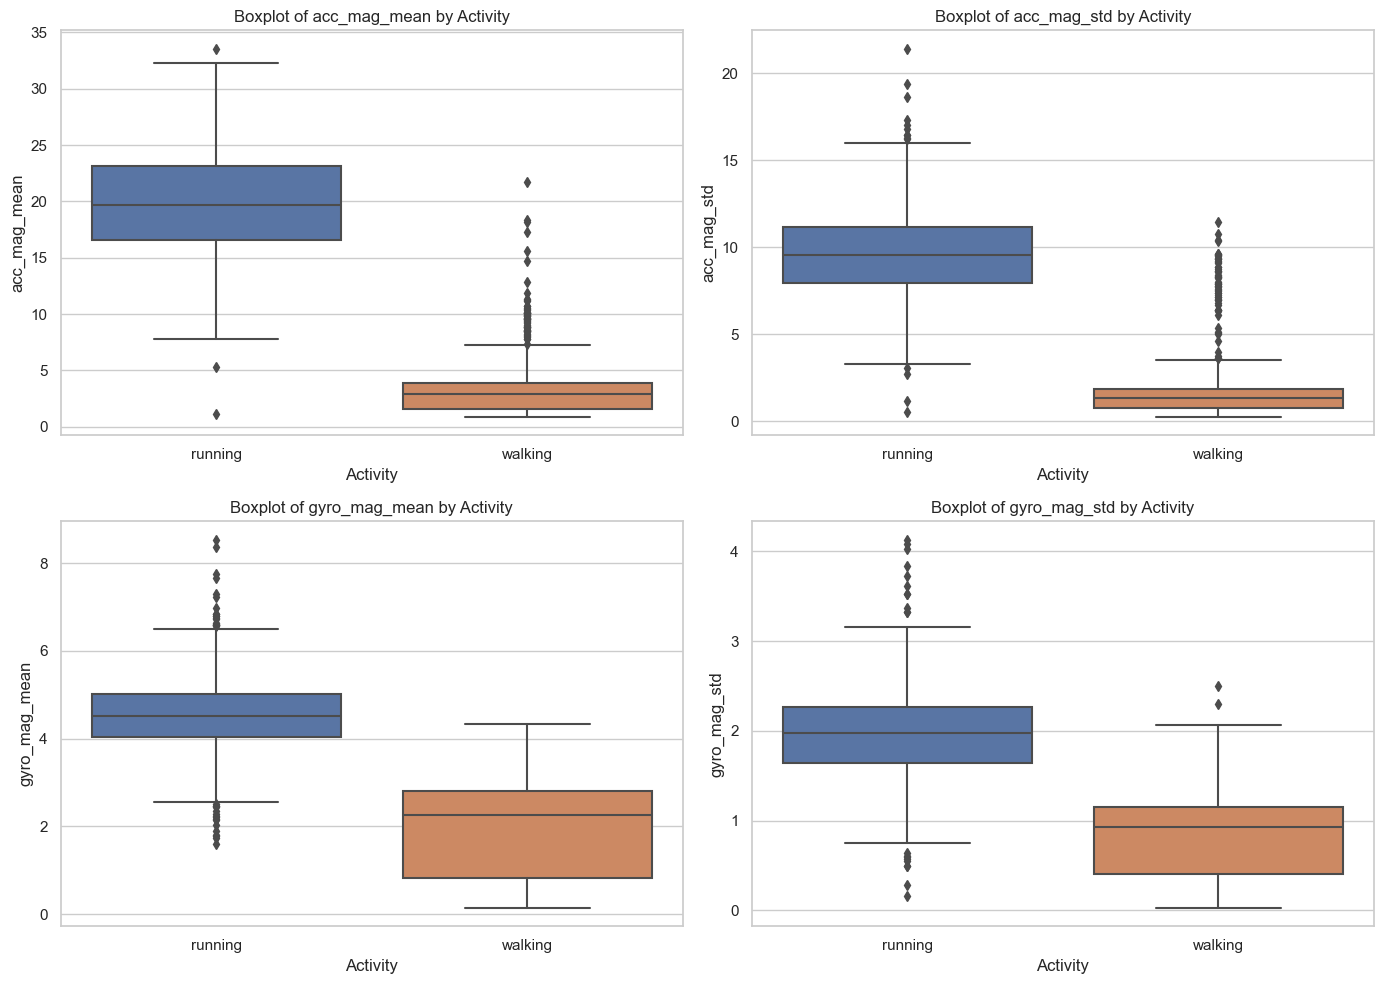

In [140]:
# Restore correct label column name
agg_features.rename(columns={"Label_": "Label"}, inplace=True)

# Create boxplots for selected features
plt.figure(figsize=(14, 10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=agg_features, x="Label", y=feature)
    plt.title(f'Boxplot of {feature} by Activity')
    plt.xlabel("Activity")
    plt.ylabel(feature)

plt.tight_layout()
plt.show()



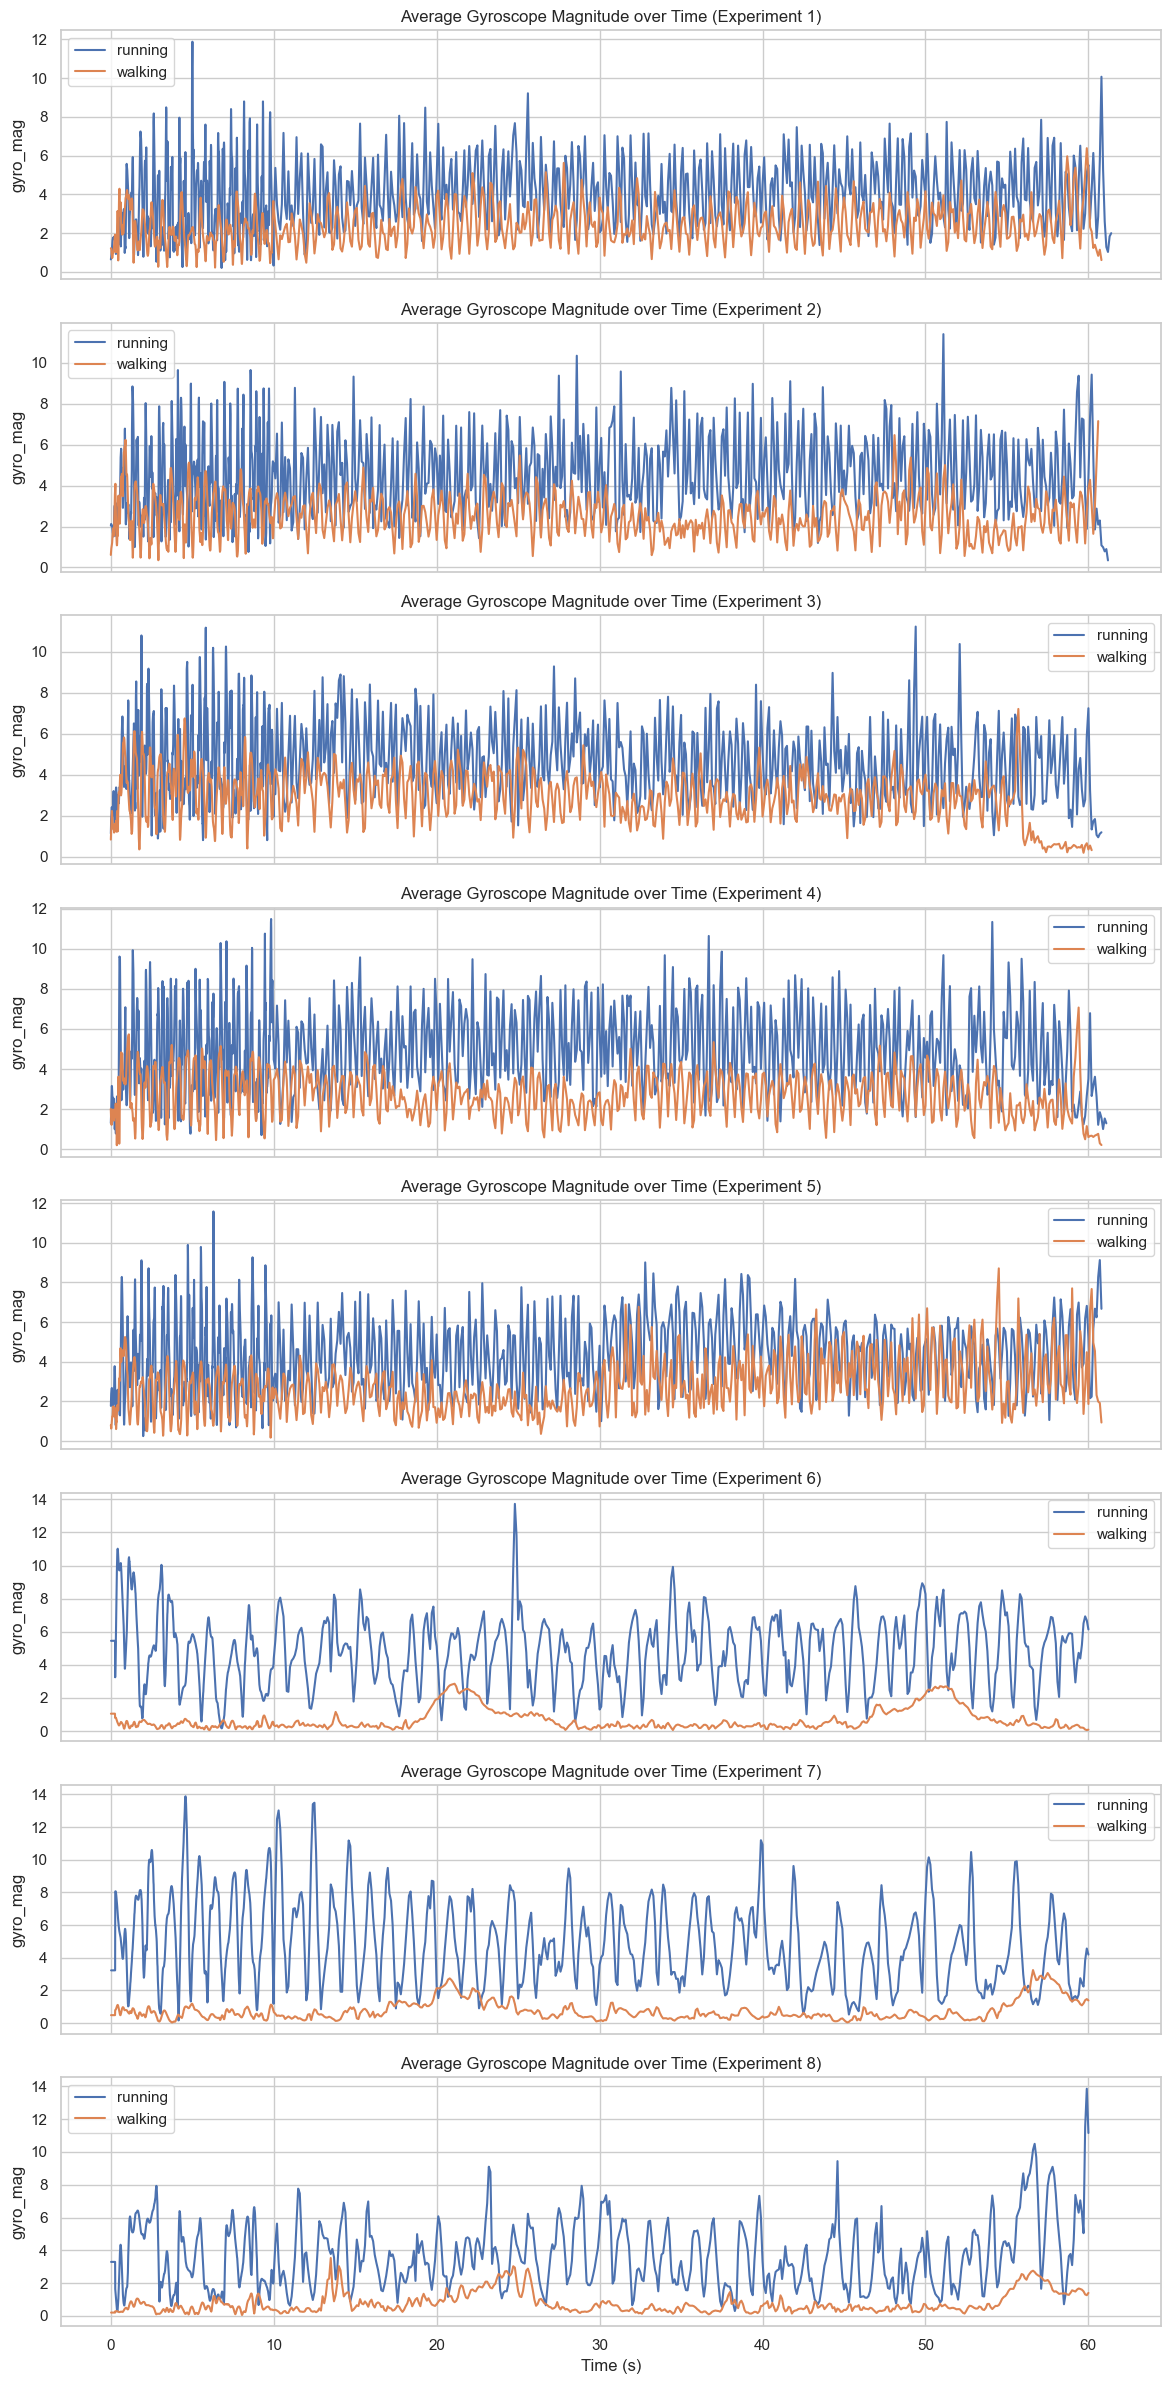

In [141]:
# Create average gyroscope magnitude per time (averaged across all experiments for each activity)
gyro_avg_per_time = combined_df.groupby(["Label", "Experiment", "Time (s)"])["gyro_mag"].mean().reset_index()

# Plot gyroscope magnitude over time per experiment
unique_experiments = sorted(combined_df["Experiment"].unique())
num_experiments = len(unique_experiments)

# Create a subplot for each experiment
fig, axs = plt.subplots(nrows=num_experiments, figsize=(12, 3 * num_experiments), sharex=True)

for i, exp in enumerate(unique_experiments):
    ax = axs[i] if num_experiments > 1 else axs
    for label in gyro_avg_per_time["Label"].unique():
        subset = gyro_avg_per_time[(gyro_avg_per_time["Experiment"] == exp) & (gyro_avg_per_time["Label"] == label)]
        ax.plot(subset["Time (s)"], subset["gyro_mag"], label=label)
    ax.set_title(f"Average Gyroscope Magnitude over Time (Experiment {int(exp)})")
    ax.set_ylabel("gyro_mag")
    ax.legend()

plt.xlabel("Time (s)")
plt.tight_layout()
plt.show()


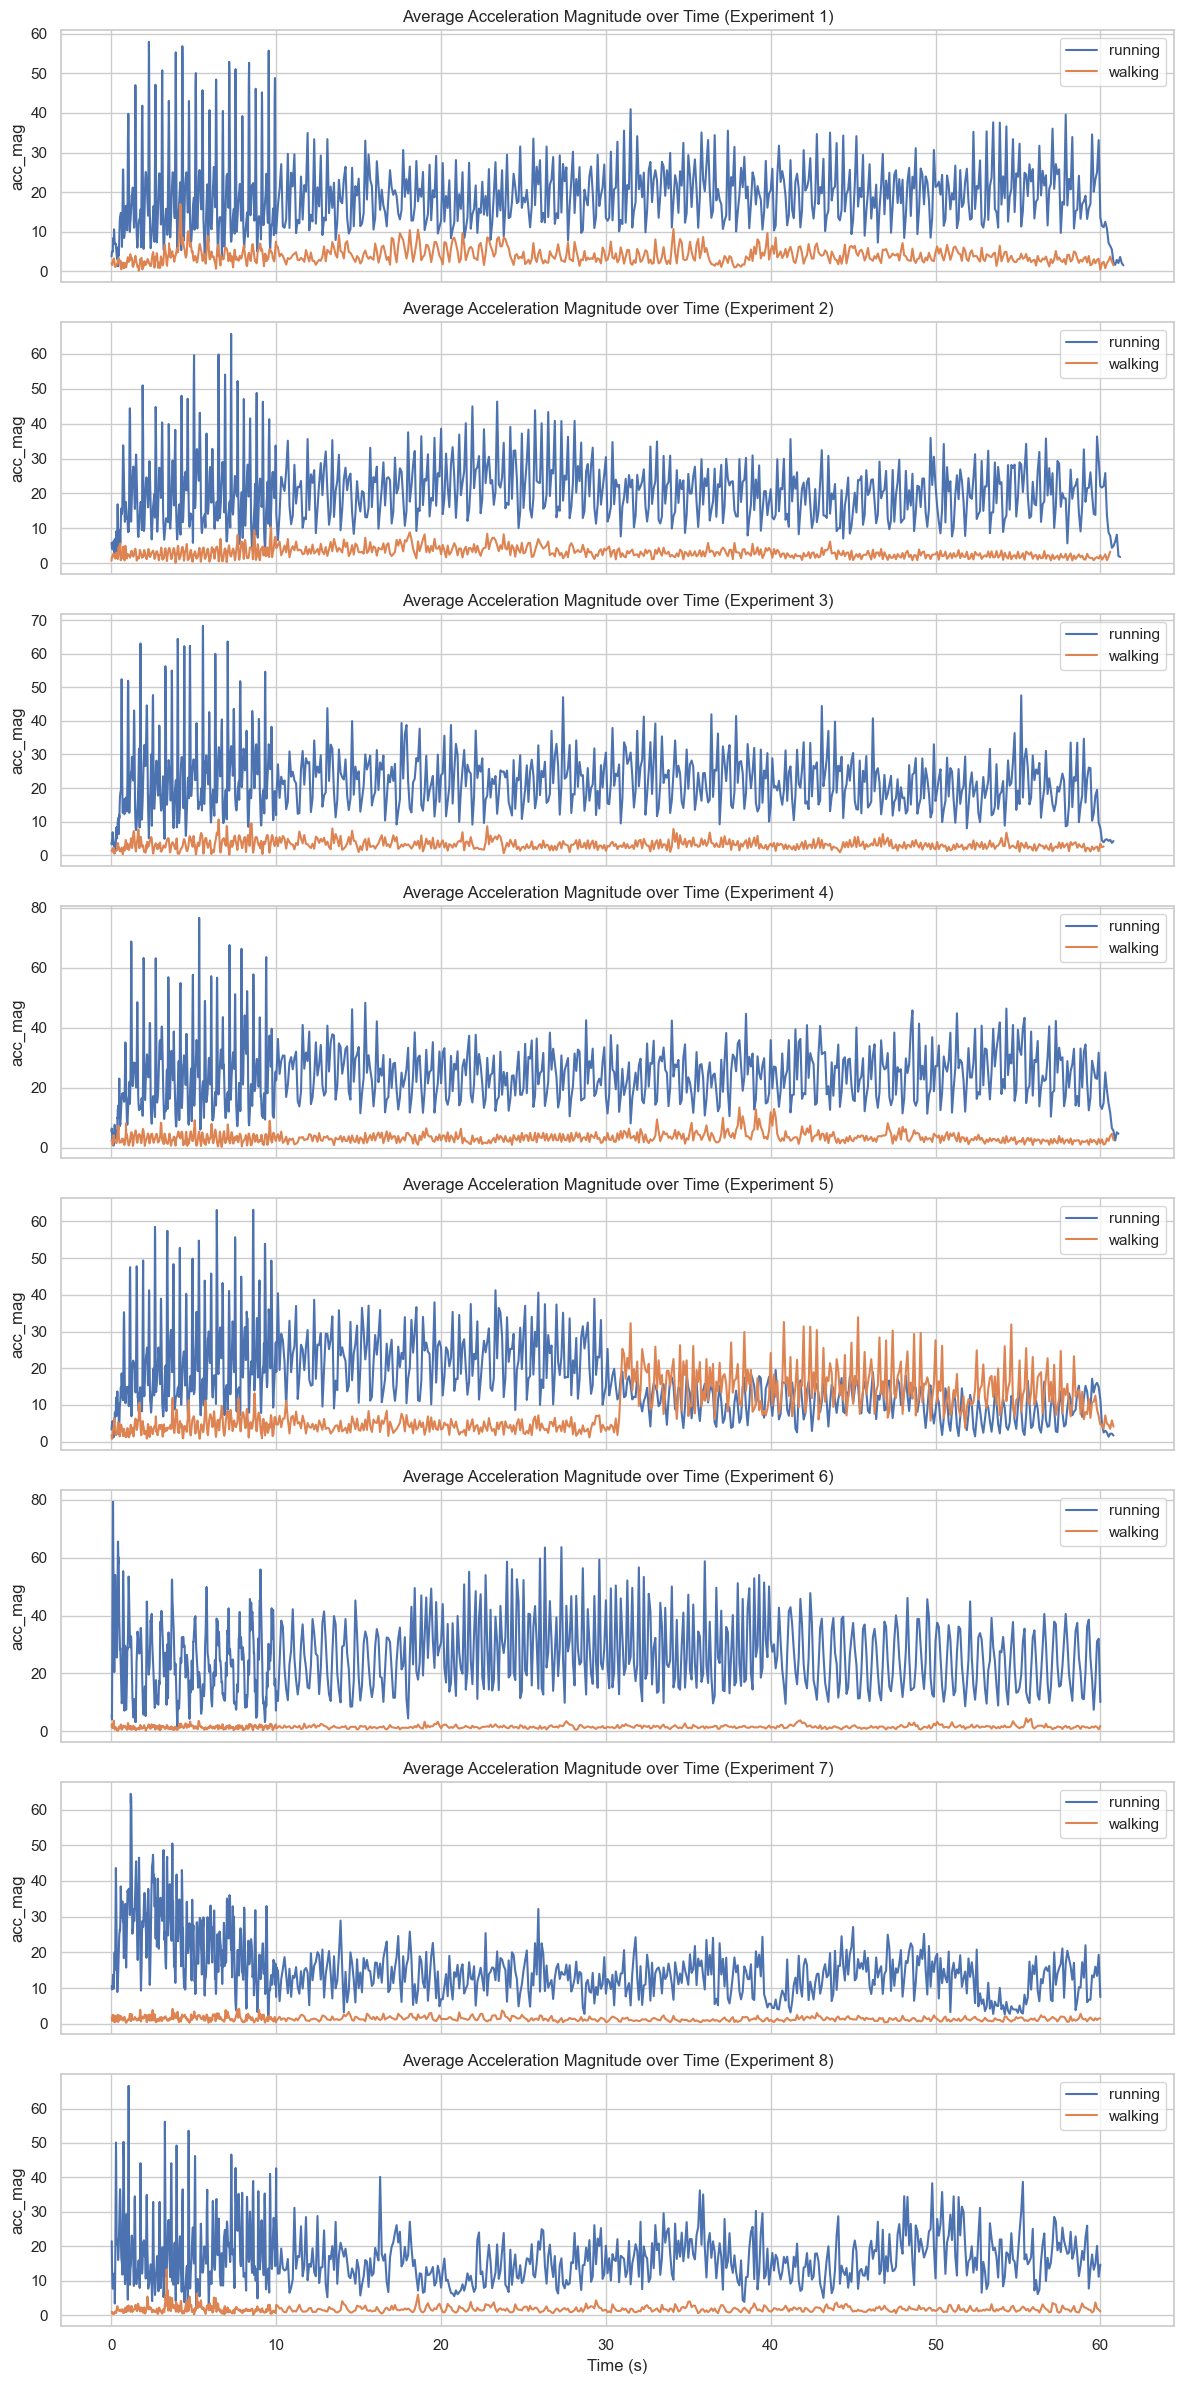

In [142]:
# Compute average acceleration magnitude per time (across experiments and labels)
combined_df["acc_mag"] = np.sqrt(
    combined_df["Linear Acceleration x (m/s^2)"]**2 +
    combined_df["Linear Acceleration y (m/s^2)"]**2 +
    combined_df["Linear Acceleration z (m/s^2)"]**2
)

# Group by label, experiment, and time to compute average acc_mag
acc_avg_per_time = combined_df.groupby(["Label", "Experiment", "Time (s)"])["acc_mag"].mean().reset_index()

# Plot acceleration magnitude over time per experiment
fig, axs = plt.subplots(nrows=num_experiments, figsize=(12, 3 * num_experiments), sharex=True)

for i, exp in enumerate(unique_experiments):
    ax = axs[i] if num_experiments > 1 else axs
    for label in acc_avg_per_time["Label"].unique():
        subset = acc_avg_per_time[(acc_avg_per_time["Experiment"] == exp) & (acc_avg_per_time["Label"] == label)]
        ax.plot(subset["Time (s)"], subset["acc_mag"], label=label)
    ax.set_title(f"Average Acceleration Magnitude over Time (Experiment {int(exp)})")
    ax.set_ylabel("acc_mag")
    ax.legend()

plt.xlabel("Time (s)")
plt.tight_layout()
plt.show()


<Axes: xlabel='acc_mag_mean', ylabel='Count'>

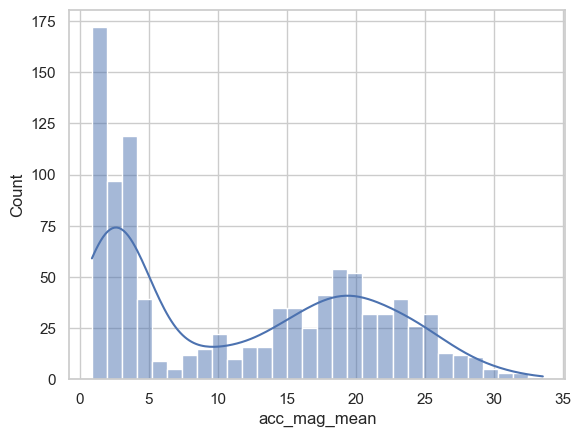

In [143]:
sns.histplot(data=agg_features, x="acc_mag_mean", bins=30, kde=True)


<Axes: xlabel='acc_mag_mean', ylabel='acc_mag_std'>

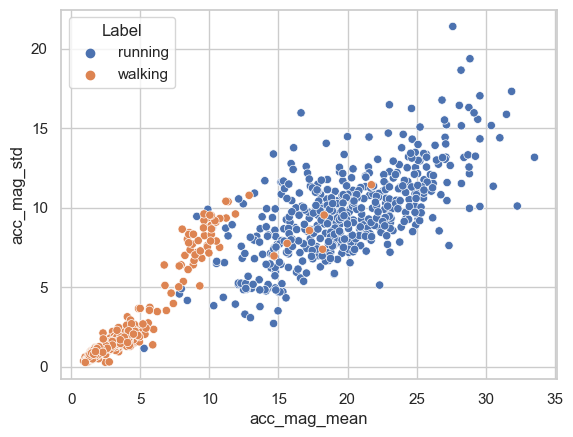

In [144]:
sns.scatterplot(data=agg_features, x="acc_mag_mean", y="acc_mag_std", hue="Label")


In [145]:
train_df = agg_features.copy()
agg_features.head()


,Label,Experiment,window,Linear Acceleration x (m/s^2)_mean,Linear Acceleration x (m/s^2)_std,Linear Acceleration y (m/s^2)_mean,Linear Acceleration y (m/s^2)_std,Linear Acceleration z (m/s^2)_mean,Linear Acceleration z (m/s^2)_std,Gyroscope x (rad/s)_mean,Gyroscope x (rad/s)_std,Gyroscope y (rad/s)_mean,Gyroscope y (rad/s)_std,Gyroscope z (rad/s)_mean,Gyroscope z (rad/s)_std,acc_mag_mean,acc_mag_std,gyro_mag_mean,gyro_mag_std
0,running,1.0,0,1.995500,12.455357,0.979786,8.571703,2.047218,4.877921,-0.505668,1.617246,-0.492985,1.479015,-0.051971,2.437713,12.448397,10.238050,2.793829,1.831222
1,running,1.0,1,1.519317,14.194042,-2.371885,11.937367,1.398829,7.770929,0.081372,1.749948,-0.691010,1.941513,0.949282,2.752579,17.679929,9.896110,3.462736,1.916316
2,running,1.0,2,7.942462,14.951250,-4.479782,14.305613,1.766897,8.524980,0.568171,2.682663,-0.237051,2.024996,-0.145806,2.517872,21.602536,10.772466,3.762939,1.928093
3,running,1.0,3,3.408617,14.811130,4.805970,11.506697,2.685762,4.641739,0.592054,2.465050,0.352907,1.768514,-1.124476,2.714496,17.714984,9.907183,3.744977,2.034514
4,running,1.0,4,1.607475,15.044162,-4.093652,14.300448,1.219918,5.570819,-1.008993,2.039745,-0.366635,1.696312,1.036651,3.165402,19.236131,10.421354,3.918054,1.944527


In [146]:
from scipy.stats.mstats import winsorize

# Features to Winsorize
features_to_winsorize = [
    "acc_mag_mean", "acc_mag_std",
    "gyro_mag_mean", "gyro_mag_std"
]

# Winsorization config: cap at 1st and 99th percentiles
limits = (0.01, 0.01)

# Create copy to store winsorized data
train_df_winsorized = train_df.copy()

# Store summary statistics before and after Winsorization
before_after_summary = {}

for feature in features_to_winsorize:
    before = train_df[feature].describe()
    train_df_winsorized[feature] = winsorize(train_df[feature], limits=limits)
    after = train_df_winsorized[feature].describe()
    before_after_summary[feature] = pd.DataFrame({"Before": before, "After": after})

# Show result for one example feature
before_after_summary["acc_mag_mean"]


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


,Before,After
count,983.000000,983.000000
mean,11.699754,11.686265
std,9.055875,9.024348
min,0.880276,1.141269
25%,2.896771,2.896771
50%,10.752231,10.752231
75%,19.668469,19.668469
max,33.544283,29.589571
